In [ ]:
pip install scikit-learn

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('kc_house_data.csv')

In [ ]:
# Display the first few rows of the dataframe
print(df.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [ ]:
# Check for missing values
print(df.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


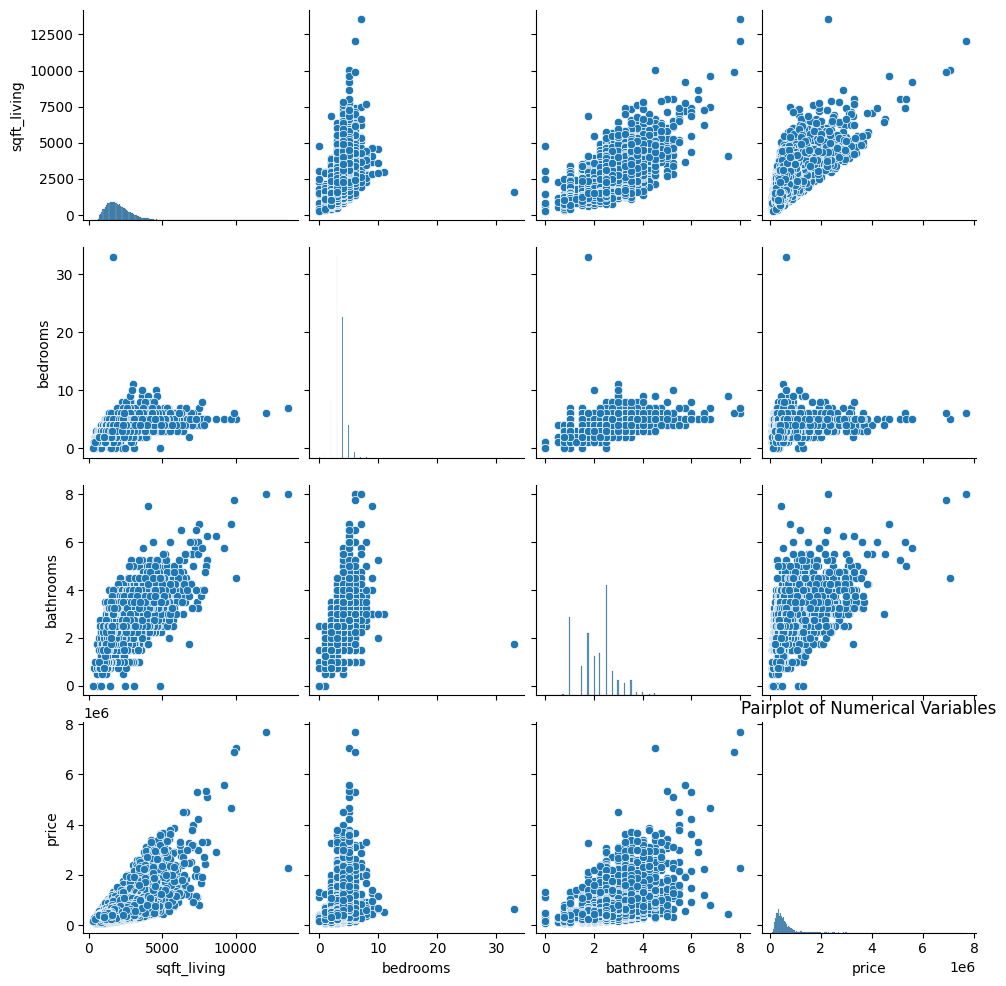

In [ ]:
# Data Visualization
# Pairplot for numerical variables
sns.pairplot(df[['sqft_living', 'bedrooms', 'bathrooms', 'price']])
plt.title('Pairplot of Numerical Variables')
plt.show()

<ipython-input-15-b6208a75e643>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


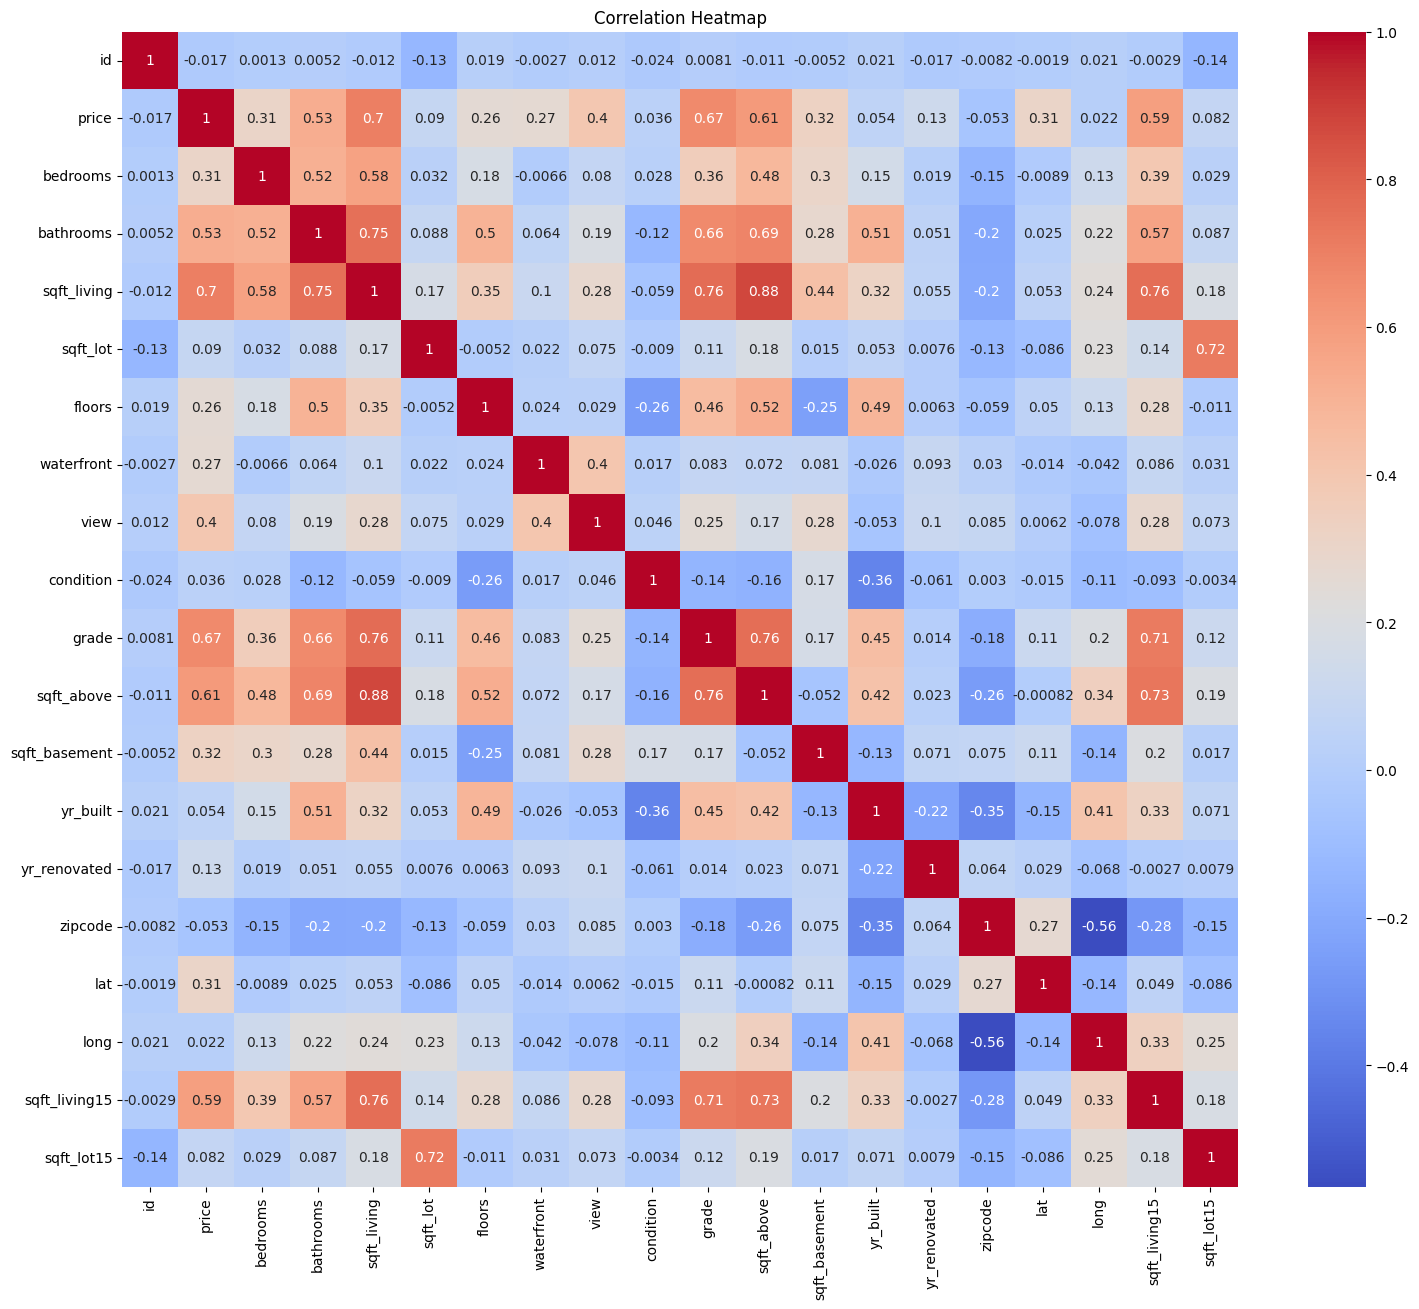

In [ ]:
# Heatmap for correlation
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Prepare data for modeling
X = df[['sqft_living', 'bedrooms', 'bathrooms']]
y = df['price']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 74237634953.1832
R^2 Score: 0.5089347172264876


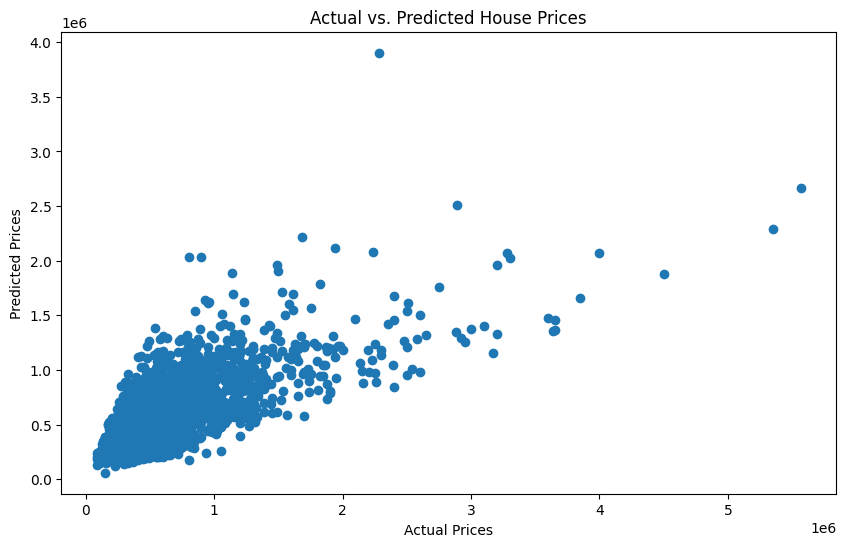

In [ ]:
# Plot predicted vs. actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()

In [ ]:
# Predicting on new data
new_data = pd.DataFrame({'sqft_living': [2000], 'bedrooms': [3], 'bathrooms': [2]})
predicted_price = model.predict(new_data)
print("Predicted Price for new house:", predicted_price[0])

Predicted Price for new house: 534649.7336624672
